<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h1>Decision Tree Regression</h1>
    <h2><a href = 'https://www.linkedin.com/in/ahmedsharaf9/' style = "text-decoration: none; color: #F5EDED">Ahmed Sharaf</a></h2>
</div>   </ul>
</div>

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Import Libraries</h2>
</div>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Import Data</h2>
</div>

In [17]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [18]:
X = data['data']
y = data['target']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Decision Tree Regression Model</h2>
</div>

In [23]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'R2 = {r2_score(y_test, y_pred)}')


MSE = 4574.393258426966
RMSE = 67.63426098085914
MAE = 52.97752808988764
R2 = 0.1366058437817067


<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Decision Tree Classifier With HyperParameter Tuning</h2>
</div>

In [24]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_model = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv = 5, scoring='neg_mean_squared_error')
grid_model.fit(X_train, y_train)
y_pred = grid_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'R2 = {r2_score(y_test, y_pred)}')

MSE = 3396.8204313692045
RMSE = 58.282247995158905
MAE = 47.75636972922602
R2 = 0.3588669044218561


In [25]:
grid_model.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [26]:
final_model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features='sqrt', splitter='best')
final_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt')

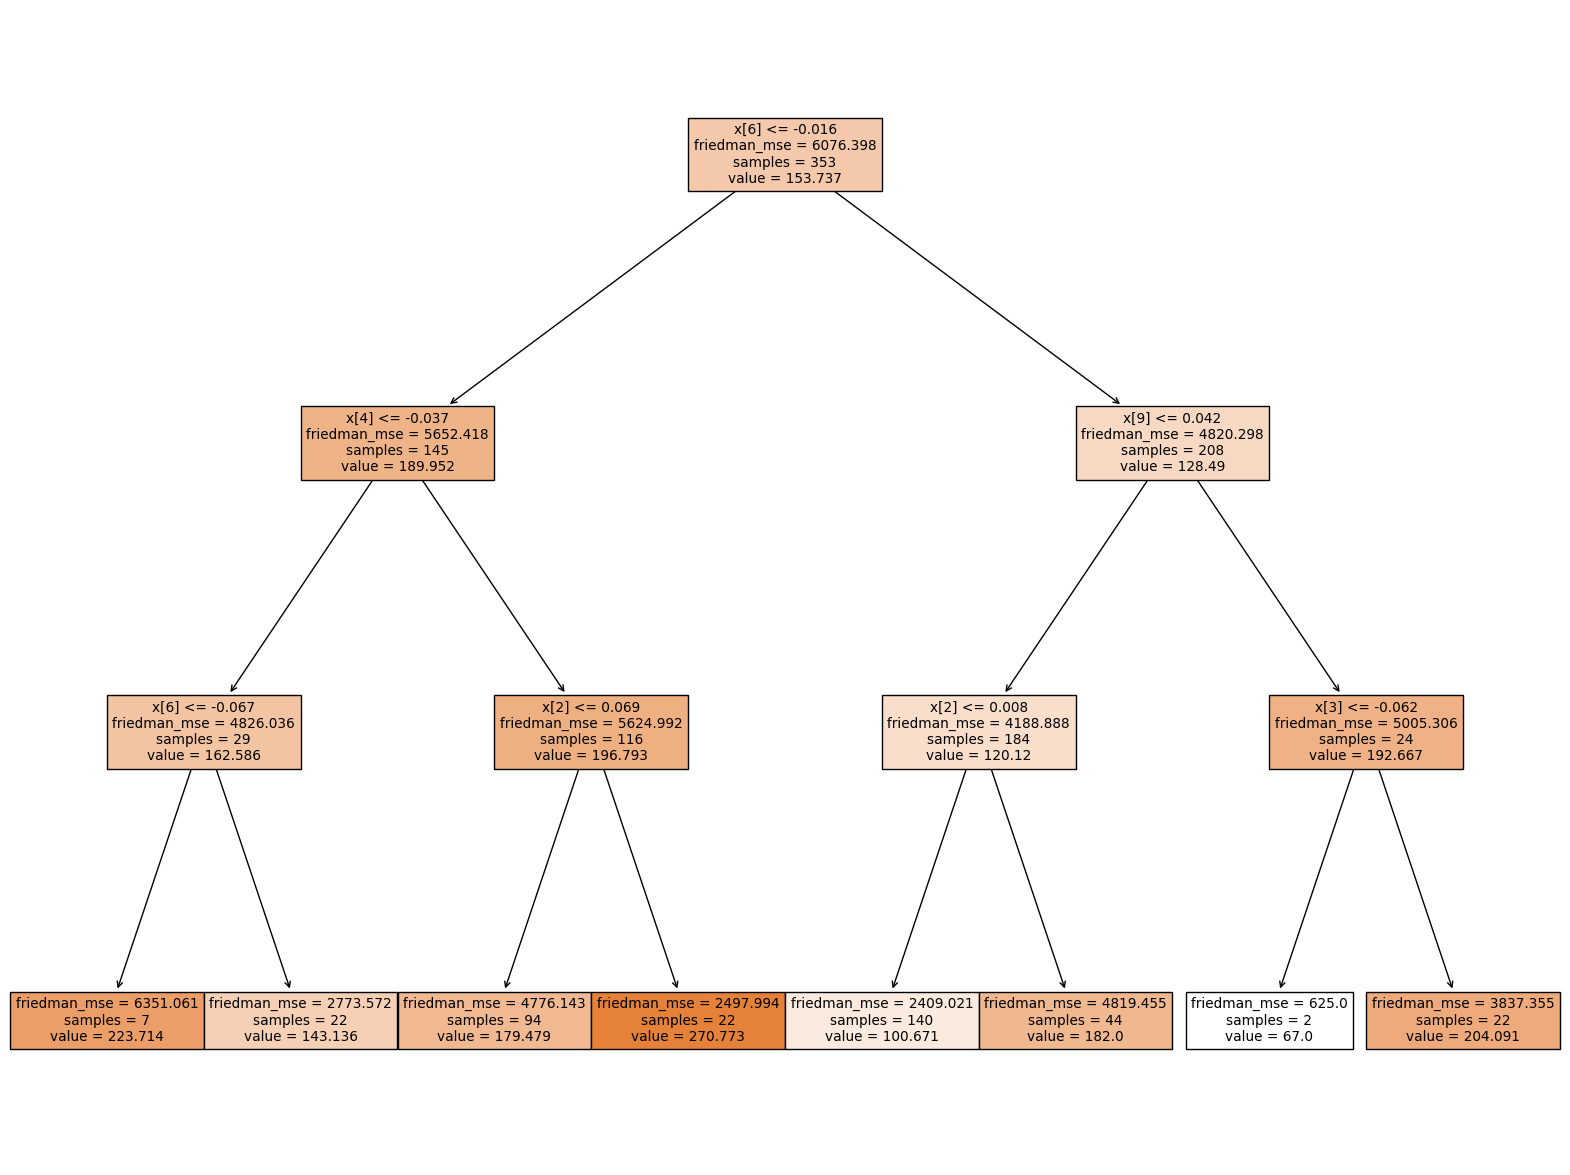

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(final_model, filled=True)
plt.show();